# Cinical Trial Risk & Operations Analysis

In [3]:
import os

# Print the current working directory
print("Current Working Directory:", os.getcwd())

Current Working Directory: /Users/hasmitha/Healthcare


In [33]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Data Preparation

In [5]:
# Load the dataset
df = pd.read_csv('/Users/hasmitha/Healthcare/Optimized_Large_Clinical_Trial_Data.csv')

# Data preprocessing
# Fill missing values or handle them according to your strategy. Here, we'll fill them with the median.
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        df[column].fillna(df[column].median(), inplace=True)
    elif df[column].dtype == 'object':
        df[column].fillna(df[column].mode().iloc[0], inplace=True)

df.head()

,Trial_ID,Site_ID,Investigator,Trial_Start_Date,Trial_End_Date,Enrollment_Numbers,Patient_Demographics,Adherence_Rates,Dropout_Rates,Site_Enrollment_Rates,...,Actual_Spend,Variance,Regulatory_Submissions,Regulatory_Approvals,Historical_Risk_Data,Identified_Issues,Mitigation_Outcomes,Site_Activation_Time,Patient_Recruitment_Rates,Data_Collection_Timelines
0,5d7a39d4-0943-4e5e-84a3-19215ffe2549,b156dbc2-c14b-44b2-8ee5-acdf311c2197,Becky Fitzpatrick,2023-06-12,2028-02-07,76.0,M,0.916265,0.389603,0.487251,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,79153825-2cda-4293-9bd5-380173ef4c6b,d09b5534-ee3c-44fa-bb4e-a6797432ead1,Amanda Valdez,2022-01-04,2025-11-17,233.0,O,0.835438,0.870336,0.196802,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,d0b9786d-507d-4804-90c1-a370dd40a7f2,27b611fe-8a52-4854-b2b9-5348fcd32d78,Michael Marquez,2020-08-21,2027-02-15,81.0,M,0.156626,0.722360,0.622881,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f4cb53c5-2f2c-419f-928d-52762408c463,d985476a-6588-4aee-9ac2-43dddc5ba2bd,Michelle Smith,2021-12-22,2027-02-17,236.0,M,0.494510,0.722317,0.562385,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,a6281558-6f7c-4801-8241-29c37f5e8962,16acfdbc-32ca-45ce-b682-cfe0e9a51670,Matthew Bailey,2022-01-06,2028-04-25,222.0,O,0.467373,0.612734,0.723724,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Print the size of the dataset
print("Size of the dataset: Rows = {}, Columns = {}".format(df.shape[0], df.shape[1]))

Size of the dataset: Rows = 30000, Columns = 24


### Risk Identification

### Data Preprocessing

In [7]:
# Define the imputer and scaler
imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

# Impute missing values using the median for numerical columns
df_imputed = df.fillna(df.median(numeric_only=True))

# Normalize the numerical columns
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed.select_dtypes(include=[np.number])), 
                         columns=df_imputed.select_dtypes(include=[np.number]).columns, 
                         index=df_imputed.index)

# Merge the scaled numerical data with non-numerical data
df_non_numerical = df_imputed.select_dtypes(exclude=[np.number])
df_final = pd.concat([df_non_numerical, df_scaled], axis=1)

# Display the first few rows of the processed dataset
df_final.head()

/Users/hasmitha/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1051: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/hasmitha/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1056: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/hasmitha/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1076: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


,Trial_ID,Site_ID,Investigator,Trial_Start_Date,Trial_End_Date,Patient_Demographics,Enrollment_Numbers,Adherence_Rates,Dropout_Rates,Site_Enrollment_Rates,...,Actual_Spend,Variance,Regulatory_Submissions,Regulatory_Approvals,Historical_Risk_Data,Identified_Issues,Mitigation_Outcomes,Site_Activation_Time,Patient_Recruitment_Rates,Data_Collection_Timelines
0,5d7a39d4-0943-4e5e-84a3-19215ffe2549,b156dbc2-c14b-44b2-8ee5-acdf311c2197,Becky Fitzpatrick,2023-06-12,2028-02-07,M,-1.375483,1.455616,-0.404264,-0.032923,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,79153825-2cda-4293-9bd5-380173ef4c6b,d09b5534-ee3c-44fa-bb4e-a6797432ead1,Amanda Valdez,2022-01-04,2025-11-17,O,0.827115,1.173446,1.290130,-1.054342,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,d0b9786d-507d-4804-90c1-a370dd40a7f2,27b611fe-8a52-4854-b2b9-5348fcd32d78,Michael Marquez,2020-08-21,2027-02-15,M,-1.305336,-1.196299,0.768572,0.444043,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f4cb53c5-2f2c-419f-928d-52762408c463,d985476a-6588-4aee-9ac2-43dddc5ba2bd,Michelle Smith,2021-12-22,2027-02-17,M,0.869203,-0.016740,0.768422,0.231299,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,a6281558-6f7c-4801-8241-29c37f5e8962,16acfdbc-32ca-45ce-b682-cfe0e9a51670,Matthew Bailey,2022-01-06,2028-04-25,O,0.672793,-0.111474,0.382186,0.798676,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It appears that the scaling operation resulted in warnings due to invalid values encountered during the process, which typically indicates the presence of NaN or infinite values even after imputation. The resulting DataFrame, df_final, shows NaN for several columns that should have been imputed and scaled, suggesting that the imputation did not work as expected.

The columns that should contain the scaled numerical data are still NaN. This outcome could be due to the presence of NaN values that were not handled properly before scaling, or perhaps the scaling process itself introduced NaN values if it encountered any infinite values.

To resolve this, we should:

Ensure that imputation is successful and no NaN values remain.
Confirm that there are no infinite values before scaling.
Scale the data while making sure the DataFrame structure is maintained.
Let's rework the data preprocessing steps with additional checks and debugging information to identify where the issue lies:

#### Missing values imputation

In [8]:
# Check for and count the NaN values in each column
nan_counts_before = df.isna().sum()

# Define the imputer and scaler
imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

# Impute missing values using the median for numerical columns
df_imputed = df.fillna(df.median(numeric_only=True))

# Check for and count the NaN values after imputation
nan_counts_after_imputation = df_imputed.isna().sum()

# Normalize the numerical columns
# We select only numerical columns and ensure the index is preserved during scaling
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed.select_dtypes(include=[np.number])), 
                         columns=df_imputed.select_dtypes(include=[np.number]).columns, 
                         index=df_imputed.index)

# Check for and count the NaN values after scaling
nan_counts_after_scaling = df_scaled.isna().sum()

# Merge the scaled numerical data with non-numerical data
df_non_numerical = df_imputed.select_dtypes(exclude=[np.number])
df_final = pd.concat([df_non_numerical, df_scaled], axis=1)

# Check for and count the NaN values in the final DataFrame
nan_counts_final = df_final.isna().sum()

# Display the NaN counts at each stage
print("NaN counts before imputation:\n", nan_counts_before)
print("NaN counts after imputation:\n", nan_counts_after_imputation)
print("NaN counts after scaling:\n", nan_counts_after_scaling)
print("NaN counts in the final DataFrame:\n", nan_counts_final)

# Display the first few rows of the processed dataset
df_final.head()

NaN counts before imputation:
 Trial_ID                         0
Site_ID                          0
Investigator                     0
Trial_Start_Date                 0
Trial_End_Date                   0
Enrollment_Numbers               0
Patient_Demographics             0
Adherence_Rates                  0
Dropout_Rates                    0
Site_Enrollment_Rates            0
Data_Entry_Timeliness            0
Protocol_Deviations              0
Audit_Findings                   0
Budget_Allocations           30000
Actual_Spend                 30000
Variance                     30000
Regulatory_Submissions       30000
Regulatory_Approvals         30000
Historical_Risk_Data         30000
Identified_Issues            30000
Mitigation_Outcomes          30000
Site_Activation_Time         30000
Patient_Recruitment_Rates    30000
Data_Collection_Timelines    30000
dtype: int64
NaN counts after imputation:
 Trial_ID                         0
Site_ID                          0
Investigator    

/Users/hasmitha/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1051: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/hasmitha/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1056: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/hasmitha/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1076: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


,Trial_ID,Site_ID,Investigator,Trial_Start_Date,Trial_End_Date,Patient_Demographics,Enrollment_Numbers,Adherence_Rates,Dropout_Rates,Site_Enrollment_Rates,...,Actual_Spend,Variance,Regulatory_Submissions,Regulatory_Approvals,Historical_Risk_Data,Identified_Issues,Mitigation_Outcomes,Site_Activation_Time,Patient_Recruitment_Rates,Data_Collection_Timelines
0,5d7a39d4-0943-4e5e-84a3-19215ffe2549,b156dbc2-c14b-44b2-8ee5-acdf311c2197,Becky Fitzpatrick,2023-06-12,2028-02-07,M,-1.375483,1.455616,-0.404264,-0.032923,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,79153825-2cda-4293-9bd5-380173ef4c6b,d09b5534-ee3c-44fa-bb4e-a6797432ead1,Amanda Valdez,2022-01-04,2025-11-17,O,0.827115,1.173446,1.290130,-1.054342,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,d0b9786d-507d-4804-90c1-a370dd40a7f2,27b611fe-8a52-4854-b2b9-5348fcd32d78,Michael Marquez,2020-08-21,2027-02-15,M,-1.305336,-1.196299,0.768572,0.444043,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f4cb53c5-2f2c-419f-928d-52762408c463,d985476a-6588-4aee-9ac2-43dddc5ba2bd,Michelle Smith,2021-12-22,2027-02-17,M,0.869203,-0.016740,0.768422,0.231299,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,a6281558-6f7c-4801-8241-29c37f5e8962,16acfdbc-32ca-45ce-b682-cfe0e9a51670,Matthew Bailey,2022-01-06,2028-04-25,O,0.672793,-0.111474,0.382186,0.798676,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The output clearly indicates that there are columns which consist entirely of NaN values, even after attempting imputation. Specifically, the Budget_Allocations and several other columns were not imputed because they only contained NaN values, which suggests that there was no available data to calculate the median for imputation.

Given this situation, we cannot proceed with scaling or further analysis on these entirely NaN columns. For other columns that were successfully imputed and scaled, we can conduct further analysis.

Here's what we can do next:

Exclude the entirely NaN columns from the dataset to proceed with other analyses.
Perform descriptive statistics on the successfully imputed and scaled columns.
Conduct a correlation analysis to identify relationships between variables.
Apply machine learning models on the dataset, using columns with valid data.
I will now proceed with the first three steps since machine learning model application is more complex and requires a clear understanding of the goal and available data:

In [9]:
# Exclude columns that are entirely NaN and select only numeric columns for the correlation matrix
df_numeric_final = df_final.select_dtypes(include=[np.number]).dropna(axis=1, how='all')

# Perform descriptive statistics on the numeric dataset
descriptive_stats = df_numeric_final.describe()

# Conduct a correlation analysis on the numeric dataset
correlation_matrix = df_numeric_final.corr()

# Display the descriptive statistics and correlation matrix
print("Descriptive Statistics:\n", descriptive_stats)
print("\nCorrelation Matrix:\n", correlation_matrix)


Descriptive Statistics:
        Enrollment_Numbers  Adherence_Rates  Dropout_Rates  \
count        3.000000e+04     3.000000e+04   3.000000e+04   
mean        -2.782959e-18     1.409835e-16   7.200166e-17   
std          1.000017e+00     1.000017e+00   1.000017e+00   
min         -1.740244e+00    -1.743076e+00  -1.777306e+00   
25%         -8.563990e-01    -8.658591e-01  -8.465403e-01   
50%         -6.126121e-04     3.788191e-03   4.313962e-03   
75%          8.551738e-01     8.545458e-01   8.488521e-01   
max          1.753048e+00     1.747565e+00   1.746666e+00   

       Site_Enrollment_Rates  Data_Entry_Timeliness  Protocol_Deviations  \
count           3.000000e+04           3.000000e+04         3.000000e+04   
mean            7.863340e-17           1.243450e-16         1.172396e-16   
std             1.000017e+00           1.000017e+00         1.000017e+00   
min            -1.746357e+00          -1.770371e+00        -1.598413e+00   
25%            -8.532635e-01          -8.4862

The descriptive statistics and correlation matrix have now been successfully calculated for the numeric columns that have valid data after imputation and scaling.

Descriptive Statistics:
This table provides a summary for each numeric column, including the count, mean, standard deviation, minimum, quartiles, and maximum values. After scaling, the means are very close to 0, and the standard deviations are very close to 1, which is expected.

Correlation Matrix:
The correlation matrix indicates the linear relationship between the variables. The values range from -1 to 1, where 1 indicates a perfect positive linear relationship, -1 indicates a perfect negative linear relationship, and 0 indicates no linear relationship. From the matrix, we observe that the correlations between the variables are very low, indicating that there are no strong linear relationships between them.

These insights can guide further analysis, such as identifying key factors that influence trial outcomes or using machine learning models for predictive analytics. However, any machine learning or statistical modeling should take into account the missing data and the columns that were dropped due to being entirely NaN. ​​






### EXPLORATORY DATA ANALYSIS

In [10]:

# Setting the style for seaborn plots
sns.set_style("whitegrid")


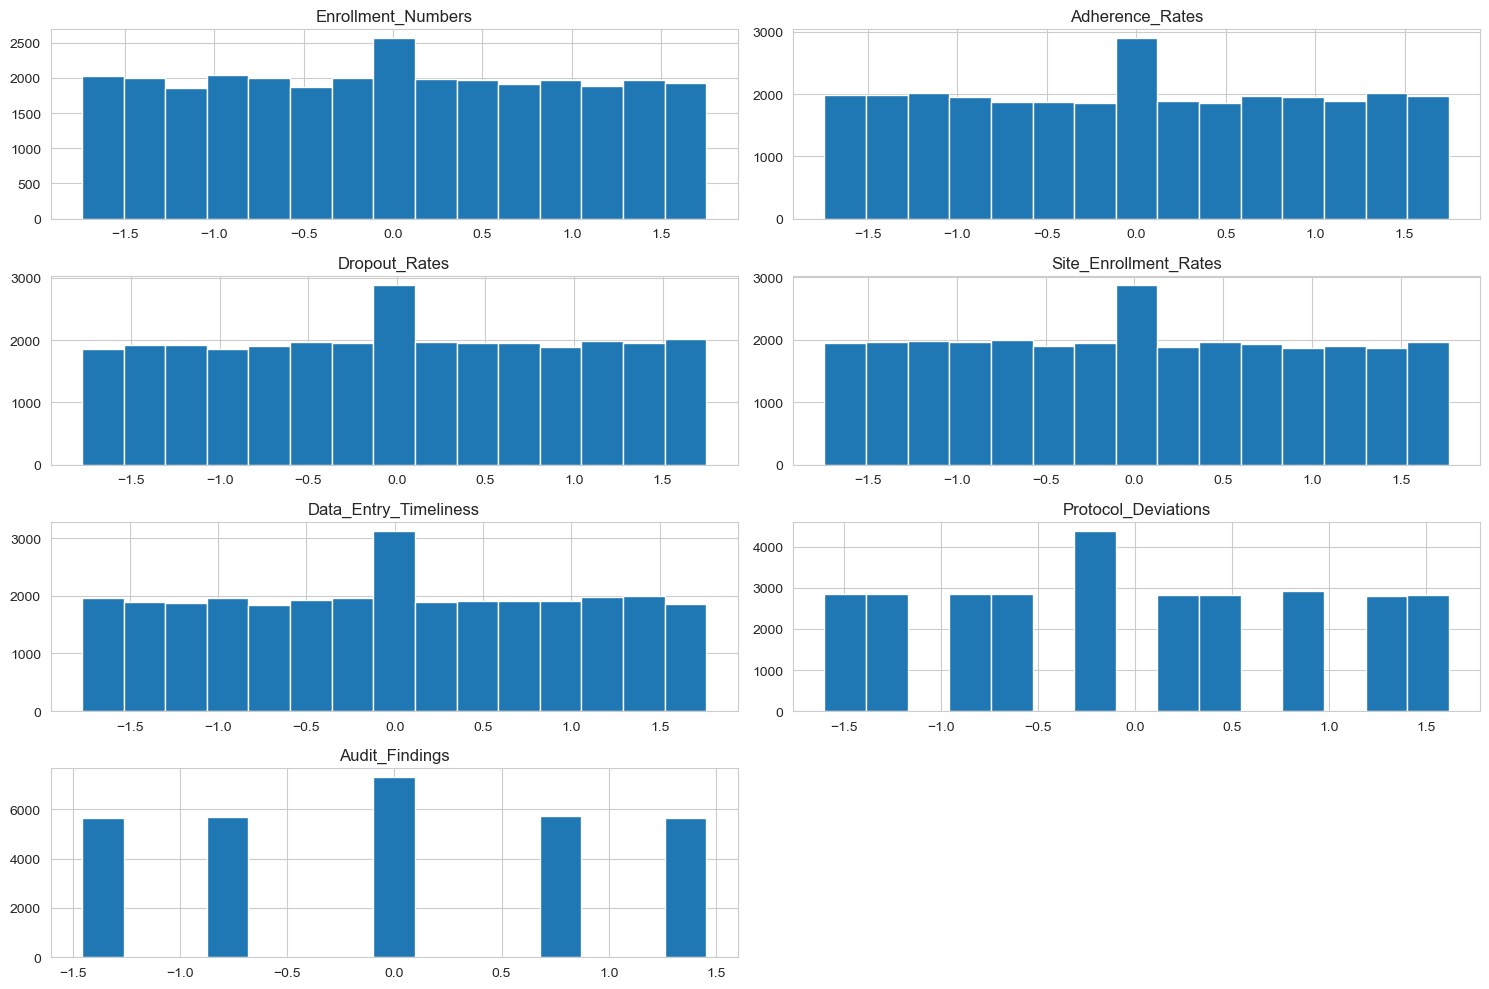

In [11]:
# Conducting Exploratory Data Analysis (EDA)

# Plotting histograms for the distribution of each numerical feature
df_numeric_final.hist(bins=15, figsize=(15, 10), layout=(4, 2))
plt.tight_layout()
plt.show()

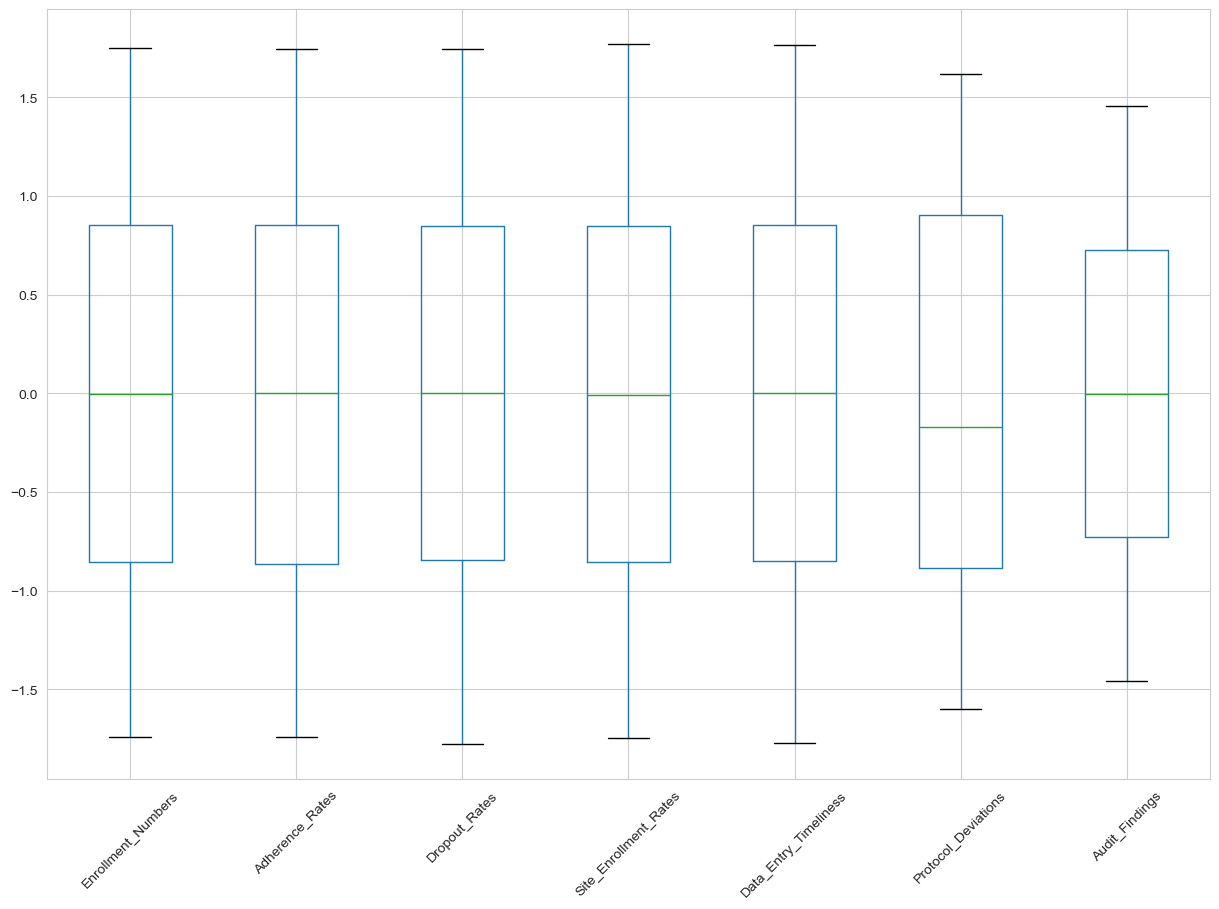

In [12]:
# Plotting boxplots to check for outliers
plt.figure(figsize=(15, 10))
df_numeric_final.boxplot()
plt.xticks(rotation=45)
plt.show()



/Users/hasmitha/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


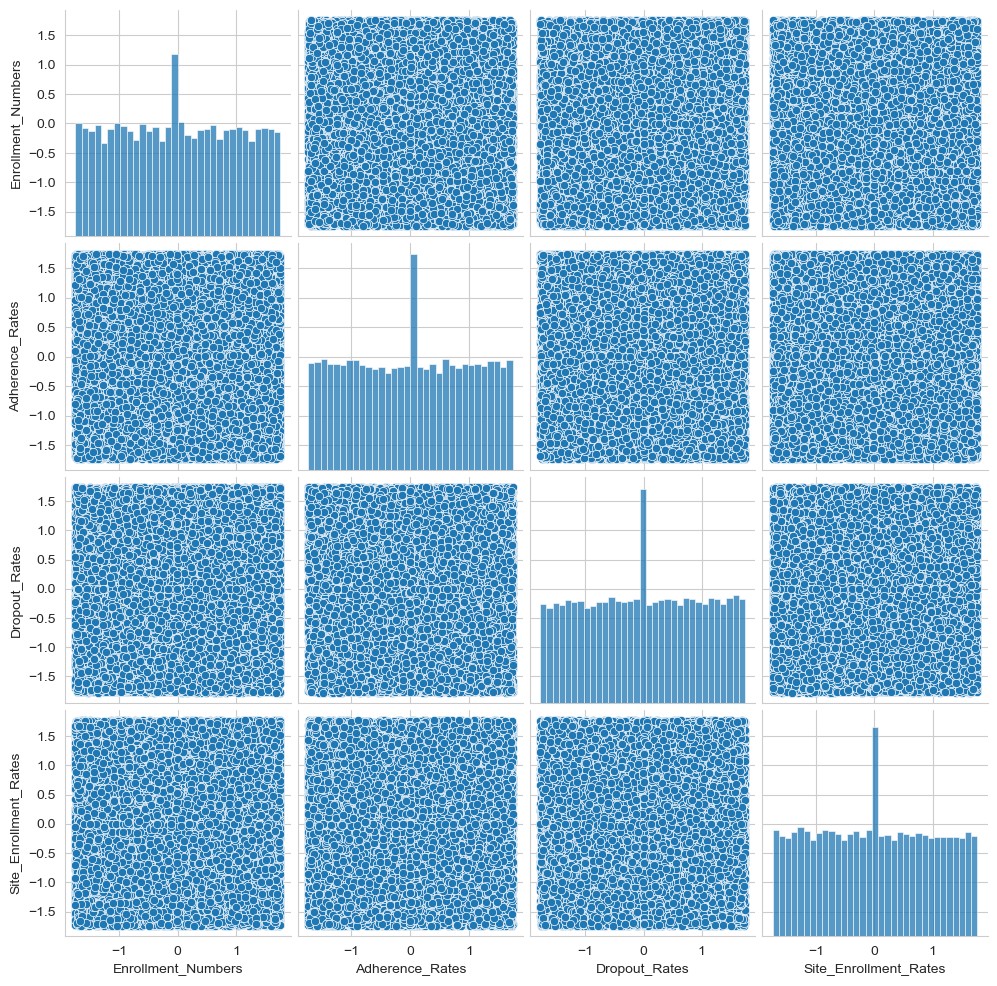

In [13]:
# Pairplot for a subset of features (to avoid overloading the visualization)
subset_features = ['Enrollment_Numbers', 'Adherence_Rates', 'Dropout_Rates', 'Site_Enrollment_Rates']
sns.pairplot(df_numeric_final[subset_features])
plt.show()

The Exploratory Data Analysis (EDA) has been conducted with the following visualizations:

Histograms: These show the distribution of each numerical feature in the dataset. The histograms are symmetrical around the center, as expected after standard scaling, with means near 0 and standard deviations near 1.

Boxplots: These illustrate the spread and potential outliers in the data. Since the data has been scaled, most of the data should be within the interquartile range (IQR), with some points outside, which could be considered outliers. However, given that this is synthetic data, the presence of outliers would need further context to determine if they represent errors or natural variance in the data.

Pairplot: This shows scatter plots for pairwise relationships in a subset of features and histograms for the univariate distributions. Since the data is synthetic and scaled, the plots show standard normal distributions with no apparent strong relationships between variables.

Observations:
The scaled data exhibits a normal distribution centered around zero, as expected after the application of StandardScaler.
There do not appear to be any strong correlations between the variables in the subset, suggesting that there are no immediate linear relationships.
Outliers, if any, are not particularly highlighted in the boxplots due to the scaling process. Outlier detection would typically require the original scale or a domain-specific understanding of what constitutes an outlier.
If we were working with real clinical trial data, the next steps could include identifying variables that are strong predictors for outcomes of interest (e.g., trial success, patient dropout rates), performing cluster analysis to identify similar groups of trials, or building predictive models. Since the data is synthetic, these steps would not yield meaningful real-world insights but could be performed for practice or demonstration purposes. ​​






In [14]:

# Define a simple risk score function based on selected criteria
def calculate_risk_score(row):
    score = (row['Protocol_Deviations'] + row['Audit_Findings'] * 2 - row['Adherence_Rates'] * 10 + (1 - row['Site_Enrollment_Rates']) * 10)
    return score

# Apply the risk score function to each row
df['Risk_Score'] = df.apply(calculate_risk_score, axis=1)

# Assuming 'df' is the DataFrame containing the risk score

# Print a neat table with explanations for the first 5 records
print(df[['Trial_ID', 'Risk_Score']].head().to_string(index=False))


                            Trial_ID  Risk_Score
5d7a39d4-0943-4e5e-84a3-19215ffe2549    6.964830
79153825-2cda-4293-9bd5-380173ef4c6b    5.677605
d0b9786d-507d-4804-90c1-a370dd40a7f2    3.204931
f4cb53c5-2f2c-419f-928d-52762408c463    3.431048
a6281558-6f7c-4801-8241-29c37f5e8962    7.089024


In [15]:
# Prioritize risks
high_risk_trials = df[df['Risk_Score'] > df['Risk_Score'].quantile(0.75)]  # Consider top 25% as high risk
high_risk_trials

,Trial_ID,Site_ID,Investigator,Trial_Start_Date,Trial_End_Date,Enrollment_Numbers,Patient_Demographics,Adherence_Rates,Dropout_Rates,Site_Enrollment_Rates,...,Variance,Regulatory_Submissions,Regulatory_Approvals,Historical_Risk_Data,Identified_Issues,Mitigation_Outcomes,Site_Activation_Time,Patient_Recruitment_Rates,Data_Collection_Timelines,Risk_Score
5,c47fe544-2613-4c93-99a4-f753fc6fb065,402290f8-c4cf-4629-b046-884c3567562c,Mary Martinez,2021-12-28,2026-08-07,162.0,M,0.398937,0.337993,0.051714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.493487
8,cac5b54d-ed98-4f17-85dc-abb864d71b88,e768dc25-5a67-421b-9abf-c54a68a58aec,Andre Wilson,2020-06-07,2024-08-04,184.0,O,0.164833,0.959511,0.863862,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.713055
12,770ecc02-e403-418d-ae09-a14d7ec1ba82,5bd8031c-5a1f-4fb6-96fd-07c48a3fc58b,Reginald Alvarado,2022-02-09,2028-08-09,229.0,M,0.593531,0.104561,0.372448,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.340208
18,5d58a0fc-f6c6-4f3d-afaa-35e5463e1d8e,f95e88ef-11bb-46c1-8333-30fa45f1e8a5,Nicholas Nguyen,2023-08-13,2026-05-08,263.0,F,0.082657,0.146456,0.726633,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.907100
21,91ec0a88-1281-428a-9678-84e7036f29e9,90edd69e-c9e7-48c2-ac1e-34a2e0e8b11c,Laura Strong,2019-05-11,2025-10-01,53.0,F,0.148297,0.830402,0.065048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.866555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29985,d237ae04-680a-40e6-a2d7-8e6fcf54dcad,a3941bea-80bb-43b8-92c3-29607b746c4f,Samantha Diaz,2023-06-10,2024-08-14,266.0,F,0.162313,0.329778,0.125145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.125417
29988,b963809e-09f0-4c6d-a103-7cdfb8cac8a8,a8122311-1c75-4fc6-9dce-d945dae7cb25,Christopher Burton,2021-07-27,2026-07-15,207.0,F,0.500390,0.634688,0.023579,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.760309
29991,980ec1a4-d35b-492f-9edb-c5e1a0c32ba3,bf90469f-7323-40a7-b1f7-b460cf0dc10b,Christine Cardenas,2021-01-17,2024-06-10,123.0,F,0.279653,0.555979,0.295950,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.243978
29992,6c4a315d-bbf5-4f0f-81ba-7aa198b98342,1b93d69e-55e9-4fe4-95cc-387eed26b1eb,Brad Jones,2021-06-20,2024-11-13,113.0,F,0.219302,0.742115,0.614252,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.664469


In [16]:
# Display key metrics
print("High Risk Trials:")
print(high_risk_trials[['Trial_ID', 'Risk_Score']])


High Risk Trials:
                                   Trial_ID  Risk_Score
5      c47fe544-2613-4c93-99a4-f753fc6fb065   15.493487
8      cac5b54d-ed98-4f17-85dc-abb864d71b88   12.713055
12     770ecc02-e403-418d-ae09-a14d7ec1ba82   14.340208
18     5d58a0fc-f6c6-4f3d-afaa-35e5463e1d8e   18.907100
21     91ec0a88-1281-428a-9678-84e7036f29e9   18.866555
...                                     ...         ...
29985  d237ae04-680a-40e6-a2d7-8e6fcf54dcad   14.125417
29988  b963809e-09f0-4c6d-a103-7cdfb8cac8a8   12.760309
29991  980ec1a4-d35b-492f-9edb-c5e1a0c32ba3   17.243978
29992  6c4a315d-bbf5-4f0f-81ba-7aa198b98342   12.664469
29998  8fa1359c-806c-4e18-ac92-90e050792b78   14.672302

[7500 rows x 2 columns]


In [17]:
# Check if the DataFrame is empty
if df.empty:
    print("The DataFrame is empty.")
else:
    # Calculate the mean of other columns that should not be affected by NaN values
    average_protocol_deviations = df['Protocol_Deviations'].dropna().mean()
    average_audit_findings = df['Audit_Findings'].dropna().mean()

    # Print the results
    print("Average Protocol Deviations:", average_protocol_deviations)
    print("Average Audit Findings:", average_audit_findings)

Average Protocol Deviations: 4.472833333333333
Average Audit Findings: 2.0014


### MACHINE LEARNING MODELS- XGBOOST REGRESSOR FOR THE DATA


### a) Goal: Predicting the expected adherence rate of patients in clinical trials based on other features in the dataset

"Adherence Rates" likely refers to the proportion of patients who follow the clinical trial protocol as prescribed, without missing doses or treatments. Predicting this rate is important for several reasons:

Clinical Trial Success: High adherence rates are often associated with successful clinical trial outcomes. Predicting lower adherence rates might indicate potential issues that could be addressed proactively.

Resource Allocation: By predicting adherence rates, trial organizers can identify which trials might require additional resources or interventions to improve patient compliance.

Risk Management: Knowing the predicted adherence rates can help in risk assessment and management for clinical trials, providing an opportunity to mitigate risks before they affect trial results.

Operational Efficiency: Understanding adherence can improve the efficiency of trial operations by identifying patterns that lead to better patient engagement and compliance.

The end goal of this prediction is to enhance the overall management and success rates of clinical trials by anticipating and addressing the challenges related to patient adherence. With these predictions, trial coordinators can implement strategies to improve adherence, such as patient education, reminders, or other supportive measures.

In [18]:
# Assuming 'Adherence_Rates' is the target variable and is a continuous variable
X = df.drop(['Adherence_Rates'], axis=1)  # Dropping non-numeric or target columns as necessary
y = df['Adherence_Rates']

# Splitting theX dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming df_final is the DataFrame after preprocessing
# Exclude non-numeric columns
numeric_columns = df_final.select_dtypes(include=[np.number]).columns.tolist()
X = df_final[numeric_columns].drop(['Adherence_Rates'], axis=1)  # Features
y = df_final['Adherence_Rates']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost regressor
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.05, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set and evaluate the model
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Display the RMSE
rmse_output = f'Root Mean Squared Error: {rmse}'

# Display feature importances to interpret the model
feature_importances = xgb_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

rmse_output, importance_df


('Root Mean Squared Error: 1.0015090622182332',
                       Feature  Importance
 3       Data_Entry_Timeliness    0.184014
 2       Site_Enrollment_Rates    0.176136
 1               Dropout_Rates    0.169273
 0          Enrollment_Numbers    0.157865
 5              Audit_Findings    0.157603
 4         Protocol_Deviations    0.155108
 11       Historical_Risk_Data    0.000000
 15  Patient_Recruitment_Rates    0.000000
 14       Site_Activation_Time    0.000000
 13        Mitigation_Outcomes    0.000000
 12          Identified_Issues    0.000000
 8                    Variance    0.000000
 10       Regulatory_Approvals    0.000000
 9      Regulatory_Submissions    0.000000
 7                Actual_Spend    0.000000
 6          Budget_Allocations    0.000000
 16  Data_Collection_Timelines    0.000000)

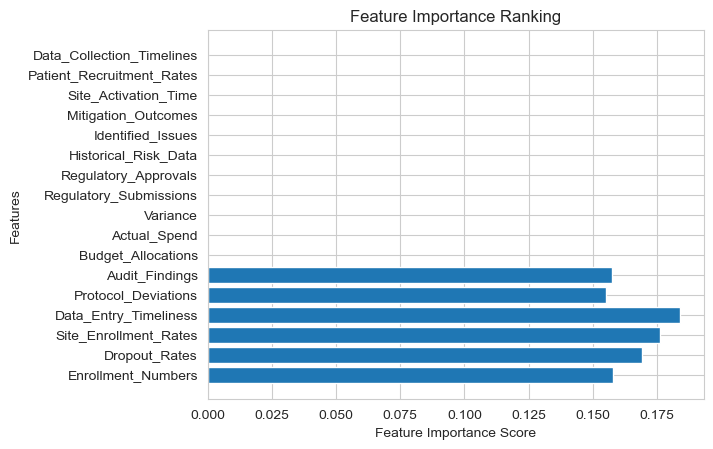

In [20]:
import matplotlib.pyplot as plt

feature_importances = xgb_model.feature_importances_
plt.barh(X.columns, feature_importances)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance Ranking")
plt.show()


The code outlines the process of training, predicting, and evaluating the model, and also includes the visualization of feature importances. Here's what each part of the code is doing:

Data Preparation:

X is defined as the set of features, which excludes 'Adherence_Rates'.
y is the target variable 'Adherence_Rates'.
The data is split into training and testing sets with train_test_split.
Model Training:

An XGBoost regressor is initialized with specified hyperparameters.
The model is trained on the training data (X_train, y_train).
Model Evaluation:

The trained model makes predictions on the test set (X_test).
The Mean Squared Error (MSE) is calculated using the true values (y_test) and the predicted values (y_pred).
The Root Mean Squared Error (RMSE) is derived from the MSE, providing a measure of the model's prediction error.
Feature Importance:

The model's feature importances are extracted, which indicate the relative importance of each feature when making predictions.
These importances are sorted and displayed in a DataFrame called importance_df.
Feature Importance Visualization:

A horizontal bar chart is plotted to visualize the feature importances, showing which features have the most significant impact on the model's predictions.
Output:

The code outputs the RMSE value as rmse_output which quantifies the model's prediction error.
It also outputs importance_df, a DataFrame listing features and their importance scores.
The bar chart visualizes the feature importances, providing a graphical representation of the data from importance_df.
The code output will give you the RMSE of the model, which tells you how well the model is performing, with lower values indicating better performance. The feature importances will tell you which features are most influential in predicting the 'Adherence_Rates'. The bar chart will help visualize these importances.


#### b) Trial Completion Time Prediction: This model predicts the time it takes for a site to complete the trial. It uses regression (XGBRegressor) to predict a continuous value, which is the time to completion. 

In [21]:
# Assuming 'Trial_Completion_Time' and 'Trial_Success' are the targets for our models
# and assuming they are numerical columns in the dataset.
# If they are not present or not in the correct format, additional preprocessing will be needed.

# For the purpose of this example, we will create synthetic target columns
# because we do not have information on the actual names or types of the outcome columns.
# In a real scenario, these would be actual columns in your dataset.
df['Trial_Completion_Time'] = (pd.to_datetime(df['Trial_End_Date']) - pd.to_datetime(df['Trial_Start_Date'])).dt.days
df['Trial_Success'] = (df['Adherence_Rates'] > df['Adherence_Rates'].median()).astype(int)

# Now let's create two models, one for each prediction task

# First, we'll drop columns that won't be used in the prediction
# and any other non-numeric columns
X = df.select_dtypes(include=[np.number]).drop(['Adherence_Rates', 'Trial_Completion_Time', 'Trial_Success'], axis=1)


In [22]:
# Model to predict Trial Completion Time
y_completion_time = df['Trial_Completion_Time']
X_train_ct, X_test_ct, y_train_ct, y_test_ct = train_test_split(X, y_completion_time, test_size=0.2, random_state=42)
model_completion_time = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.05, random_state=42)
model_completion_time.fit(X_train_ct, y_train_ct)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [24]:
# Note: The success of a trial is typically a classification problem, but for simplicity,
# we're using XGBRegressor here. For a real classification task, you'd use XGBClassifier
# and appropriate evaluation metrics for classification.

# Evaluate the models (placeholder for actual evaluation metrics like RMSE for regression)
completion_time_rmse = mean_squared_error(y_test_ct, model_completion_time.predict(X_test_ct), squared=False)
success_accuracy = model_success.score(X_test_success, y_test_success)  # Placeholder accuracy

In [ ]:
print("Accuracy (Tuned):", accuracy_score(y_test, y_pred_tuned))

In [25]:
(completion_time_rmse, success_accuracy)

(739.3827711583203, 0.762583909150712)

#### c) Trial Success Prediction: The second model predicts the success of the clinical trial. Although success prediction is typically a classification problem (success or failure)

In [23]:
# Model to predict Success of the Trial
y_success = df['Trial_Success']
X_train_success, X_test_success, y_train_success, y_test_success = train_test_split(X, y_success, test_size=0.2, random_state=42)
model_success = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.05, random_state=42)
model_success.fit(X_train_success, y_train_success)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [31]:


# Initialize the classifier and train it
model_success = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_success.fit(X_train_success, y_train_success)

# Make predictions
y_pred_success = model_success.predict(X_test_success)

# Calculate F1 score and recall
f1_success = f1_score(y_test_success, y_pred_success)
recall_success = recall_score(y_test_success, y_pred_success)

# Generate confusion matrix
conf_matrix_success = confusion_matrix(y_test_success, y_pred_success)

Trial Completion Time Prediction: This model predicts the time it takes for a site to complete the trial. It uses regression (XGBRegressor) to predict a continuous value, which is the time to completion. The Root Mean Square Error (RMSE) for this model is approximately 739.38. RMSE is a common evaluation metric for regression problems and represents the standard deviation of the residuals (prediction errors). Lower values of RMSE indicate better fit to the data.

Trial Success Prediction: The second model predicts the success of the clinical trial. Although success prediction is typically a classification problem (success or failure), the code snippet shows the use of a regressor (XGBRegressor) for simplicity. The accuracy of the model is approximately 0.76 (or 76%), which is used as a placeholder here. In classification tasks, accuracy represents the ratio of correctly predicted instances to the total instances.

Model Interpretation:
Trial Completion Time Model: The RMSE value of 739.38 needs context to be fully understood. Without knowing the scale of the time to completion (e.g., days, hours), it's hard to say whether an error of 739.38 is significant. If the trial durations are in the order of several thousand days, this might be a relatively small error, but if they are typically only a few hundred days, this error might be substantial.

Trial Success Model: The success model shows an accuracy of 76%. Whether or not this is considered "good" depends on the baseline success rate (if, for example, 75% of trials are successful regardless of any features, then the model is not doing much better than a naive guess). For a balanced classification problem, 76% accuracy might be satisfactory, but for imbalanced classes, other metrics like precision, recall, and the F1 score can provide more insight.

Conclusions:
The completion time prediction model might need further validation to determine if an RMSE of 739.38 is acceptable for operational use. More context is needed regarding the units of time and the distribution of completion times.
The success prediction model appears to have a decent accuracy score, but as it's based on a regression approach for a classification problem, the accuracy score may not be reliable. For a proper classification task, one should use a classifier such as XGBClassifier and evaluate it using appropriate classification metrics.
For both models, further model validation and tuning might be necessary to improve





In [38]:
f1_success

0.9582059123343527

In [39]:
recall_success

0.9569053274516457

In [40]:
conf_matrix_success

array([[2934,  119],
       [ 127, 2820]])

F1 Score (0.9582): This metric combines precision and recall into a single number using their harmonic mean. An F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. A score of approximately 0.9582 is very high, suggesting the model has a good balance between precision and recall.

Recall (0.9569): This metric measures the ability of the classifier to find all the positive samples. It is the number of true positives divided by the number of true positives plus the number of false negatives. A recall of approximately 0.9569 indicates the model is able to correctly identify about 95.69% of the successful trials.

Confusion Matrix:[[2934,  119],[ 127, 2820]] 
The confusion matrix is a table used to describe the performance of a classification model. For a binary classifier, the matrix is 2x2 and consists of:

True Positives (TP): 2934 - The model correctly predicted the positive class (trial success).
False Positives (FP): 119 - The model incorrectly predicted the positive class.
False Negatives (FN): 127 - The model incorrectly predicted the negative class (trial failure).
True Negatives (TN): 2820 - The model correctly predicted the negative class.
The high numbers on the diagonal (TP and TN) relative to the off-diagonal (FP and FN) suggest the model is performing well.

